In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from scipy import stats
from scipy.stats import linregress

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
from sqlalchemy import desc
from sqlalchemy import and_, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Using the inspector to print the column names within the [] table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Using the inspector to print the column names within the [] table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [12]:
# Create a session
session = Session(engine)

In [13]:
# Use the session to query Measurement table and display the first 5 locations
for row in session.query(Measurement, Measurement.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x7fb302788e10>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x7fb302788e80>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x7fb302788ef0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x7fb302788f60>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x7fb302788fd0>, 'USC00519397')


In [14]:
# Use the session to query Measurement table and display the first 5 locations
for row in session.query(Station, Station.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x7fb3027d7198>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x7fb3027d7208>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x7fb3027d7278>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x7fb3027d72e8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurement object at 0x7fb302788fd0>, 'USC00519397')


In [15]:
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [16]:
# Join
session.query(Measurement.station, Station.station).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC0051

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.

last_date = session.query(Measurement).order_by(desc(Measurement.date)).first()
print(last_date.date)

2017-08-23


In [18]:
# Query date that is one year prior to this one.  364 is used as I only want the days since the year prior.
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=364)
print(first_date)

2016-08-24


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]

# Starting from the most recent data point in the database identified above.
query = session.query(*sel).\
    filter(and_(func.date(Measurement.date) >= "2016-08-24"), func.date(Measurement.date) <= "2017-08-23").\
    group_by(Measurement.date).\
    order_by(desc(Measurement.date)).all()

query

# Sort the dataframe by date


[('2017-08-23', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-21', 0.0),
 ('2017-08-20', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-17', 0.0),
 ('2017-08-16', 0.0),
 ('2017-08-15', 0.02),
 ('2017-08-14', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-08', 0.0),
 ('2017-08-07', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.0),
 ('2017-08-04', 0.02),
 ('2017-08-03', 0.0),
 ('2017-08-02', 0.0),
 ('2017-08-01', 0.02),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.0),
 ('2017-07-29', 0.0),
 ('2017-07-28', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.0),
 ('2017-07-25', 0.0),
 ('2017-07-24', 0.05),
 ('2017-07-23', 0.0),
 ('2017-07-22', 0.03),
 ('2017-07-21', 0.0),
 ('2017-07-20', 0.03),
 ('2017-07-19', 0.0),
 ('2017-07-18', 0.05),
 ('2017-07-17', 0.03),
 ('2017-07-16', 0.02),
 ('2017-07-15', 0.0),
 ('2017-07-14', 0.02),
 ('2017-07-13', 0.07),
 ('2017-07-12', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-10', 0.0),

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_query = pd.DataFrame.from_records(query, columns=["Date", "Precip"])
df_query
print(len(df_query))

365


In [21]:
# Check to make sure data frame was loaded correctly.
df_query.head(10)

,Date,Precip
0,2017-08-23,0.00
1,2017-08-22,0.00
2,2017-08-21,0.00
3,2017-08-20,0.00
4,2017-08-19,0.00
5,2017-08-18,0.00
6,2017-08-17,0.00
7,2017-08-16,0.00
8,2017-08-15,0.02
9,2017-08-14,0.00


In [22]:
# Replace "None" values in cells with "0.0".
df_query["Precip"] = df_query["Precip"].replace(["None"], 0.00)

In [23]:
# Check object types.
df_query.dtypes

Date       object
Precip    float64
dtype: object

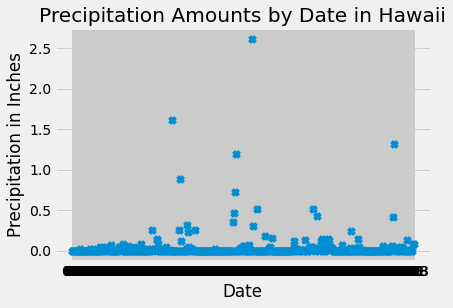

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
# Dependent Values for Scatter Plot
plt.scatter(df_query["Date"], df_query["Precip"], marker="x", edgecolors="red")
# plt.subplots(3, 1, figsize=(10, 7), constrained_layout=True)

# Size, Labels, and Grid
plt.title("Precipitation Amounts by Date in Hawaii")
plt.ylabel("Precipitation in Inches")
plt.xlabel("Date")
plt.xticks(df_query["Date"],df_query["Precip"])

# plt.grid(True)
# Show plot
plt.show()

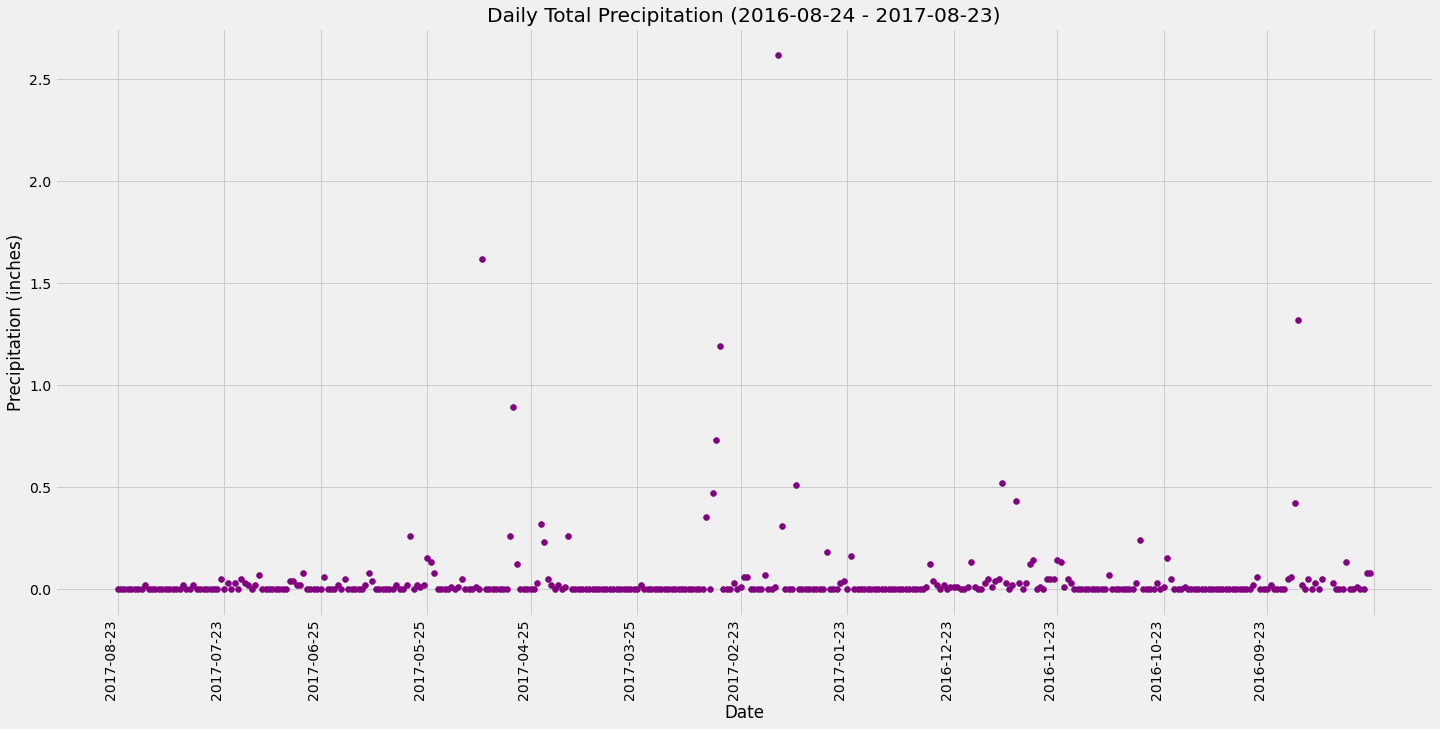

In [25]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(22, 12))

# Add x-axis and y-axis
ax.scatter(df_query["Date"], df_query["Precip"], color='purple')

# Set title, labels, and limits for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation (2016-08-24 - 2017-08-23)")

# Ensure a major tick for each month using (interval=1) 
plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))


plt.show()

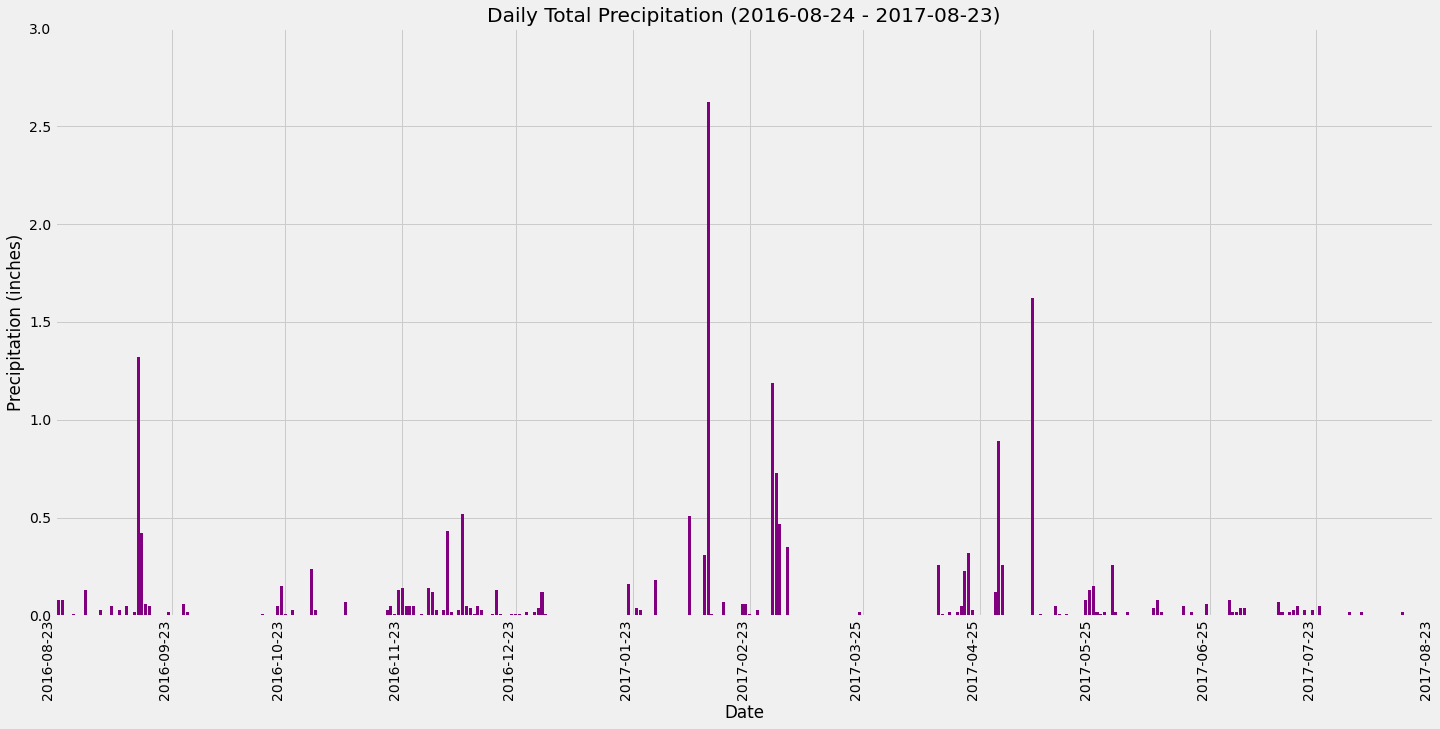

In [26]:
# Create figure and plot space using the bar plot.
fig, ax = plt.subplots(figsize=(22, 12))

# Add x-axis and y-axis
ax.bar(df_query["Date"], df_query["Precip"], color='purple')

# Set title, labels, and limits for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation (2016-08-24 - 2017-08-23)",
       xlim=["2016-08-23", "2017-08-23"], ylim=[0, 3])

# Ensure a major tick for each month using (interval=1) 
plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))


plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# Determine if there are any potential outliers in the average occupancy in California
quartiles = df_query["Precip"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of precipitation is: {lowerq}")
print(f"The upper quartile of precipitation is: {upperq}")
print(f"The interquartile range of precipitation is: {iqr}")
print(f"The the median of precipitation is: {quartiles[0.5]} ")

The lower quartile of precipitation is: 0.0
The upper quartile of precipitation is: 0.02
The interquartile range of precipitation is: 0.02
The the median of precipitation is: 0.0 


In [29]:
# More summary statistics which also includes upper and lower bounds.

lower_bound = lowerq # - (1.5*iqr)(commented out as this is already 0.0.)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Display the outliers.
outlier_precip = df_query.loc[(df_query["Precip"] < lower_bound) | (df_query["Precip"] > upper_bound)]
outlier_precip

Values below 0.0 could be outliers.
Values above 0.05 could be outliers.


,Date,Precip
41,2017-07-13,0.07
54,2017-06-30,0.08
60,2017-06-24,0.06
73,2017-06-11,0.08
85,2017-05-30,0.26
90,2017-05-25,0.15
91,2017-05-24,0.13
92,2017-05-23,0.08
106,2017-05-09,1.62
114,2017-05-01,0.26


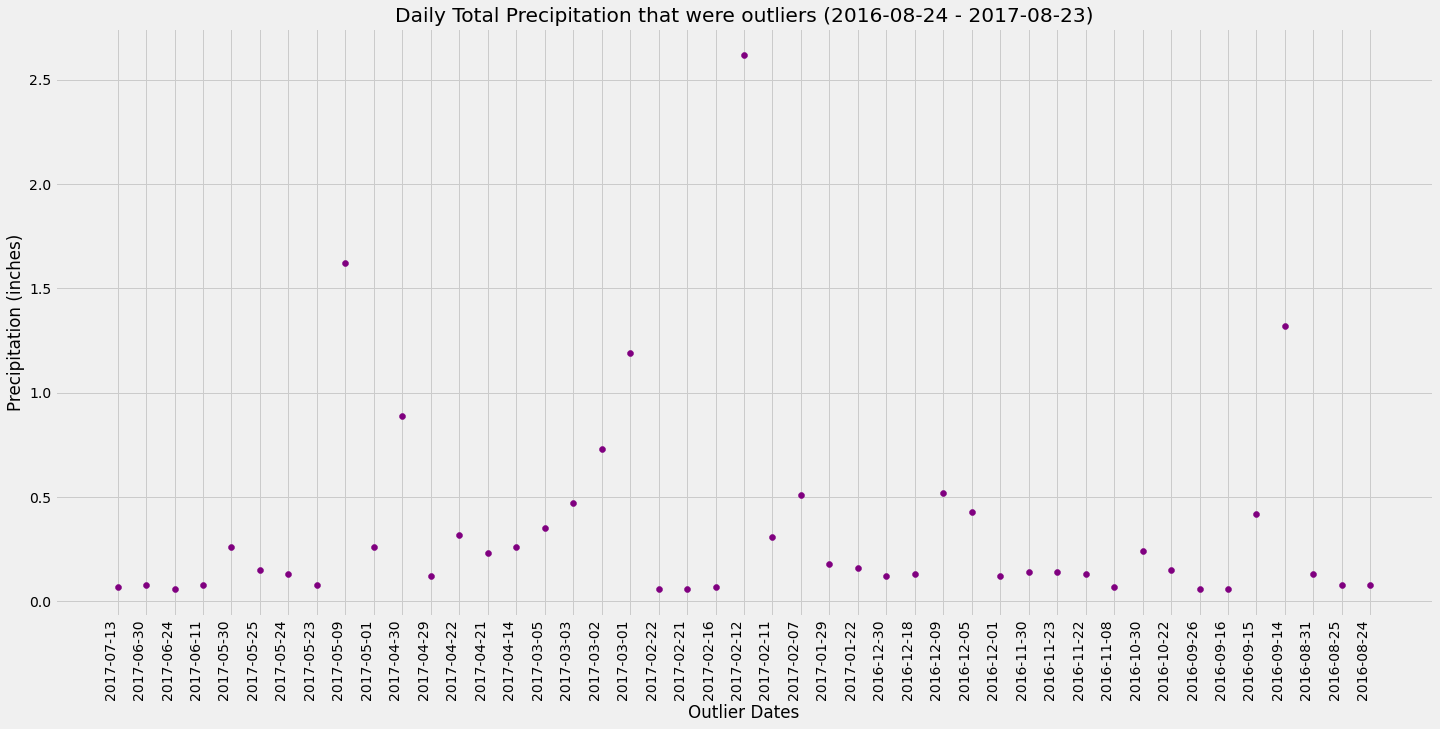

In [34]:
# Plot the outliers.
# Create figure and plot space
fig, ax = plt.subplots(figsize=(22, 12))

# Add x-axis and y-axis
ax.scatter(outlier_precip["Date"], outlier_precip["Precip"], color='purple')

# Set title, labels, and limits for axes
ax.set(xlabel="Outlier Dates",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation that were outliers (2016-08-24 - 2017-08-23)")

# Ensure a major tick for each month using (interval=1) 
plt.gcf().autofmt_xdate(rotation=90)


plt.show()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()